In [410]:
import pandas as pd
import numpy as np

In [411]:
df = pd.read_csv('spotify.csv')

# to look at data to define similarity by selecting features and understanding what to normalize
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [412]:
print(df.columns)

# making copy in case we need orignial df
pre_df = df.copy()

# dropping columns that are not needed
# Unnamed - no data, duration_ms - not to consider for similarity (not important),
# explicit - not important for general recommender, time_signature - trial and error (worse results), key - cyclic data
pre_df = pre_df.drop(['Unnamed: 0', 'duration_ms', 'explicit', 'time_signature', 'key'], axis=1)

# drop duplicates in 'track_id' column, keeping the first occurrence, as we don't care about genre this won't affect results
pre_df = df.drop_duplicates(subset=['track_id'], keep='first')

pre_df.head(20)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [413]:
# to normalize the data
from sklearn.preprocessing import MinMaxScaler

# features that might influence song similarity - no need for mode (binary) and genre (categorical)
continuous_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                       'instrumentalness', 'liveness', 'valence', 'tempo']

# normalizing these features using min and max scaler to get values between 0 and 1
scaler = MinMaxScaler()
pre_df[continuous_features] = scaler.fit_transform(pre_df[continuous_features])

pre_df.head()

/var/folders/d3/6_5r7d716cb8gqs9y4qft_600000gp/T/ipykernel_15246/3077553277.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df[continuous_features] = scaler.fit_transform(pre_df[continuous_features])


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,230666,False,0.686294,0.4610,...,0.791392,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,149610,False,0.426396,0.1660,...,0.597377,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,210826,False,0.444670,0.3590,...,0.736123,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,201933,False,0.270051,0.0596,...,0.573701,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,198853,False,0.627411,0.4430,...,0.737103,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,4,acoustic


In [414]:
# finding the strokes album "Is This It" to ensure it will be part of the sample for hw5 testing
the_strokes_album_songs = pre_df[(pre_df['artists'].str.contains("The Strokes")) & (pre_df['album_name'] == "Is This It")]

sampling_pool = pre_df[~((pre_df['artists'].str.contains("The Strokes")) & (pre_df['album_name'] == "Is This It"))]

# sample other songs (limit for my computer - tried more)
sampled_songs = sampling_pool.sample(n=25000)

final_sampled_df = pd.concat([the_strokes_album_songs, sampled_songs])

final_sampled_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2709,2709,7kzKAuUzOITUauHAhoMoxA,The Strokes,Is This It,Last Nite,0.74,193506,False,0.633503,0.910,...,0.810684,1,0.030777,0.028614,0.000198,0.0789,0.770854,0.427502,4,alt-rock
38073,38073,56NkIxSZZiMpFP5ZNSxtnT,The Strokes,Is This It,Someday,0.70,183573,False,0.550254,0.531,...,0.777796,1,0.031192,0.003313,0.000002,0.3380,0.674372,0.435424,4,garage
38114,38114,2pAD0PKMUMtxlMvz33tYzB,The Strokes,Is This It,Is This It,0.61,151333,False,0.674112,0.679,...,0.762777,1,0.031088,0.149598,0.000048,0.3470,0.808040,0.394466,4,garage
38181,38181,2LMloFiV7DHpBhITOaBSam,The Strokes,Is This It,Hard To Explain,0.63,224426,False,0.412183,0.682,...,0.799993,1,0.060518,0.000415,0.849000,0.0999,0.626131,0.338967,4,garage
38225,38225,4KC2Z9dL4jL61Ys35N6srg,The Strokes,Is This It,Barely Legal,0.57,234733,True,0.433503,0.886,...,0.799567,1,0.038342,0.004016,0.053200,0.0909,0.861307,0.647605,4,garage


In [415]:
# sampling, normalizing and filtering done - exporting to csv for Node creation
final_sampled_df.to_csv('experimentalv2_spotify.csv')

In [416]:
from sklearn.metrics import pairwise_distances

# similarity measure to create a csv for relationships

# loading normalized dataset
df_norm = pd.read_csv('experimentalv2_spotify.csv')

# selecting features that I think is important for song similarity
features = ['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# convering to np array
X = df_norm[features].values

# getting pairwise euclidean distances
distance_matrix = pairwise_distances(X, metric='euclidean')

# to include id information alongside distances (track_id for unique id)
song_ids = df_norm['track_id'].tolist()
distances_long_df = pd.DataFrame([(song_ids[i], song_ids[j], distance_matrix[i, j]) 
                                  for i in range(len(song_ids)) 
                                  for j in range(i + 1, len(song_ids))], 
                                 columns=['SongID1', 'SongID2', 'Distance'])

In [417]:
# export to CSV - for relationships creation
distances_long_df.to_csv('experimentalv2_relationships.csv', index=False)

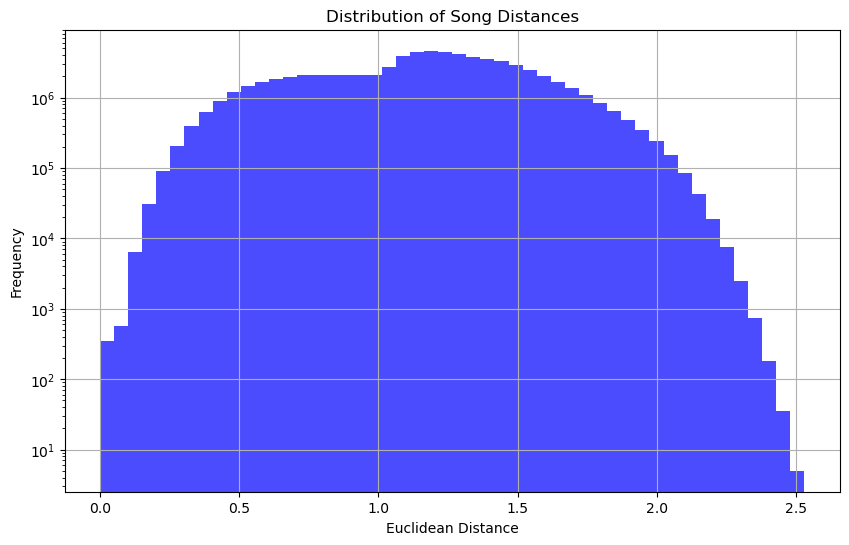

In [418]:
import matplotlib.pyplot as plt
# plotting the distribution of distances to decide threshold
plt.figure(figsize=(10, 6))
plt.hist(distances_long_df['Distance'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Song Distances')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.yscale('log')
plt.show()

In [419]:
# seems like 0.2-0.25 seems to be a reasonable threshold for a good amount of edges 
# which will yield decent recommendations, and after trial and error with threshold size
# trying to maximize the capabilities of my computer it ended up being a threshold of 0.235

In [420]:
# For future - incorporate key and genre - for now and scope of homework data type and for this use case
# it is too complex to include to get improved results